<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Absenteeism time in hours</p><br>


<p style="font-family: Arial; font-size:3em;color:#2462C0; font-style:bold">
Introduction </p>
<br>

Every work place can't help but have workers who, depending on various reasons, decide to be absent. Why is that? Is there a more recurring reason across various subjects?

According to Forbes, Absenteeism is an employee’s intentional or habitual absence from work where excessive absences can equate to decreased productivity and can have a major effect on company finances, morale and other factors. There are different types of reasons that can lead to an absence at work such as Illness, Childcare, etc. 

This project will be looking at a dataset from Brazil where records of absenteeism at work were collected from July 2007 to July 2010 at a courier company. The goal is to **find out how the company can increase productivity by decreasing absenteeism at work**.

A few questions to consider along the way:

* Which areas of life affect Abseenteeism(i.e: Work or Family..)?

* Is there an obvious relationship between reason for absence and absenteeism?

* Between regression models and Classification models, is there a better model for our problem?




# Data Exploration 

This dataset consists of **740 observations** and **21 features** with:
*  **8 Categorical features**: Reason for absence,Month of Absence, Day of the week, Seasons, Disciplinary failure,Education,Social drinker and Social smoker 

*  **13 numerical features**: ID, Transportation Expense , Distance from Residence to Work,Service time, Age , Work load , Hit target , Son, Pet, Weight, Height, Body mass index and Absenteeism time in hours 

In [712]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#First 10 rows
absent=pd.read_csv('./Absenteeism_at_work - Absenteeism_at_work.csv',sep=',')
print (type(absent))
absent.head(5)

<class 'pandas.core.frame.DataFrame'>


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


# Pre Processing

In order to build a good model, we need to have some understanding of the dataset using the Exploratory Data Analysis Process (EDA). For the first step, we will be looking at any necessary data cleaning.

In [713]:
#changing a float 64 to int64
absent['Work load Average/day ']=absent['Work load Average/day '].astype('str')
absent['Work load Average/day ']=absent['Work load Average/day '].str.replace(',', '')
absent['Work load Average/day ']=pd.to_numeric(absent['Work load Average/day '], errors='coerce')
#absent['Work load Average/day ']


In [714]:
absent.isnull().any()

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work load Average/day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Body mass index                    False
Absenteeism time in hours          False
dtype: bool

In [715]:
absent.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


* A closer inspection of those two columns reveals that all the 0's in both **Absenteeism time in hours,Month of absence and Reason for absence columns** correpond to **Absenteeism time in hours=0** . If this conclusion were to represent every employee who didn't take any absent days, the Day of the week column shouldn't be populated. I decided to categorize these **44 rows as outliers**. 

* Doing so also takes out all the **Disciplinary failure==1** leaving us with only Disciplinary failure==0. This means that this feature is no longer needed for the analysis.


The rest of the analysis will be looking at the non zero values of Absenteeism with a new dataset called **allabsents**

In [716]:
allabsents=absent[absent['Absenteeism time in hours']!=0]
allabsents=allabsents.drop(['Disciplinary failure'],axis=1)

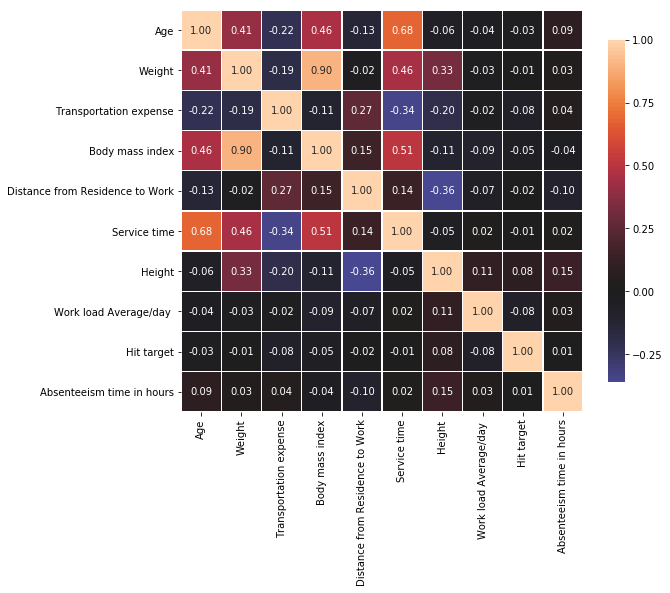

In [717]:
def correlation_heatmap(li):
    correlations = li.corr()

    fig, ax = plt.subplots(figsize=(9,9))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(allabsents[['Age','Weight','Transportation expense' ,'Body mass index','Distance from Residence to Work','Service time','Height','Work load Average/day ','Hit target','Absenteeism time in hours']])



The heatmap gives an overall sense of a correlation between features. 

* The most positive correlations are: Service and Body mass Index,Weight and Body mass Index,  Age and Service time 
* The most negative correlations are: Height and Distance ftom Residence to Work, Service time and Transportation Expense

/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


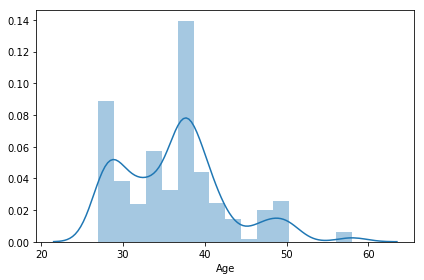

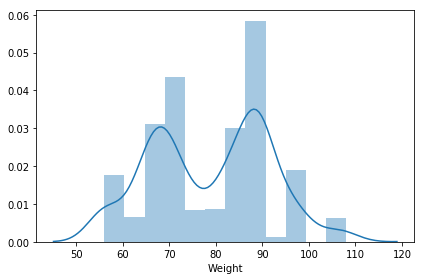

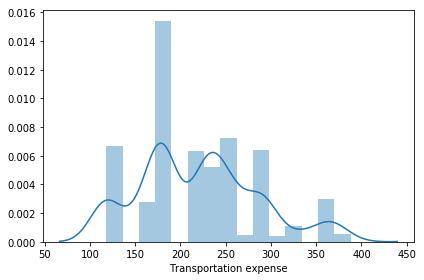

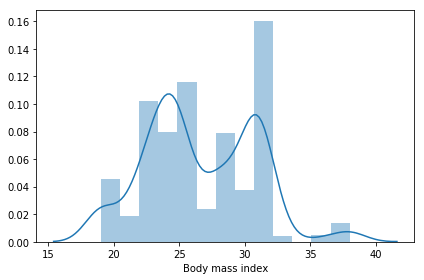

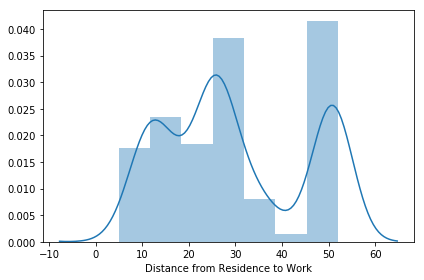

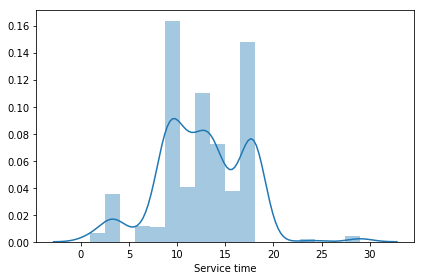

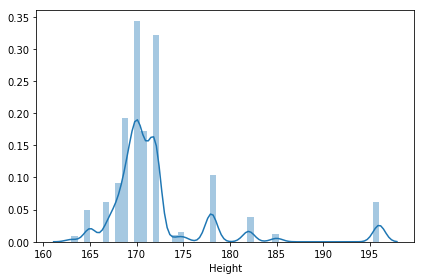

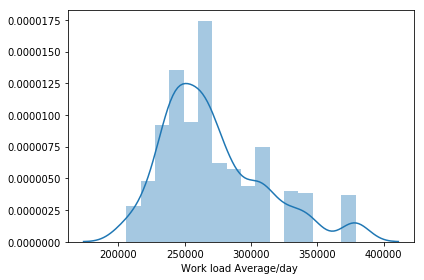

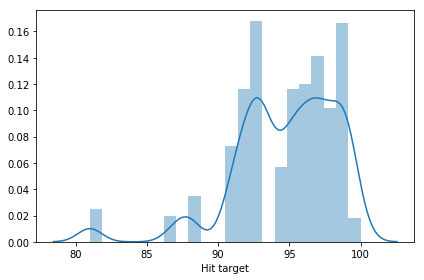

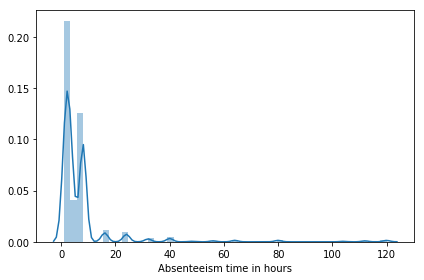

In [718]:
#col=['Age','Service time','Absenteeism time in hours','Work load Average/day ','Hit target','Weight']
col=['Age','Weight','Transportation expense' ,'Body mass index','Distance from Residence to Work','Service time','Height','Work load Average/day ','Hit target','Absenteeism time in hours']
for i in col:
    sns.distplot(allabsents[i])
    plt.tight_layout()
    plt.show()

After that, a statistical focus looks at the dynamics of employees according to Age, Service time and Absenteeism time in hours

* Most workers are in between their late 20's and early 40's. On top of that, most employees have between 10 to 18 years of service time.

It is worth noticing a few characteristics of the Absenteeism time in hours column: 
* The plot is more skewed to the right where most values are less than 80 hrs of absence. In fact, **61% of employees have been absent for less than 8hrs** and **29% of them absent for exactly 8hrs**. Hence **91% of Absenteeism time in hours is explained by ony 8 or less hours of absenteeism**.

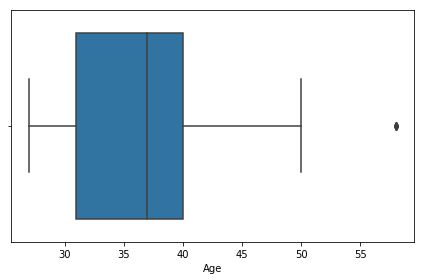

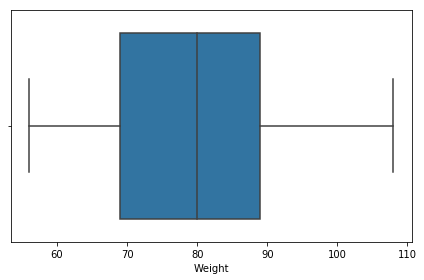

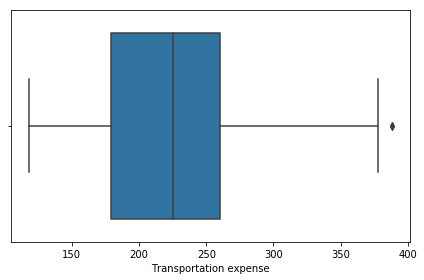

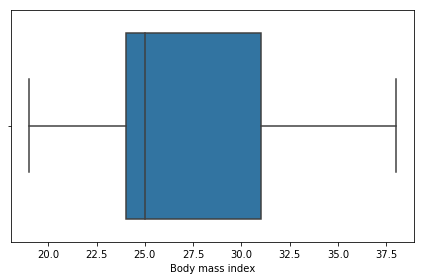

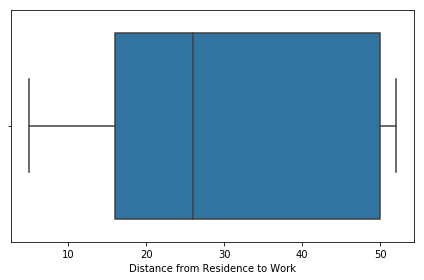

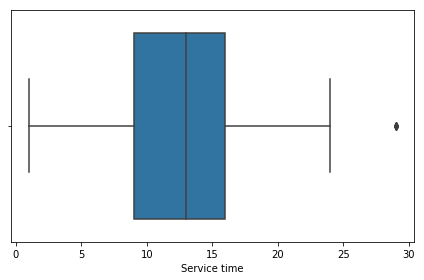

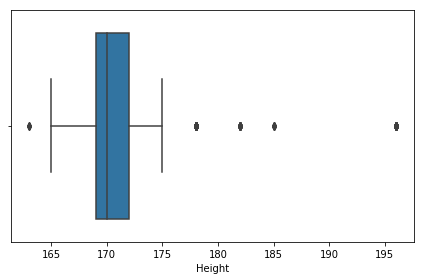

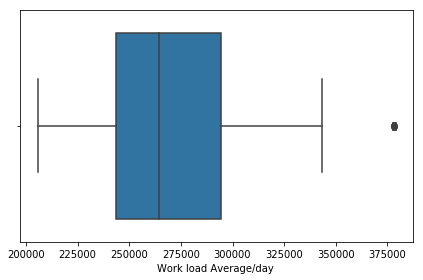

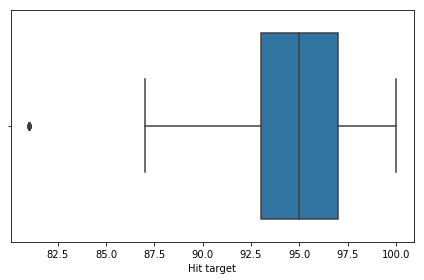

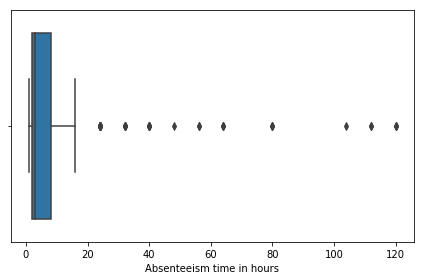

In [719]:
for i in col:
    sns.boxplot(allabsents[i])
    plt.tight_layout()
    plt.show()

These boxplots display a few outliers on these columns

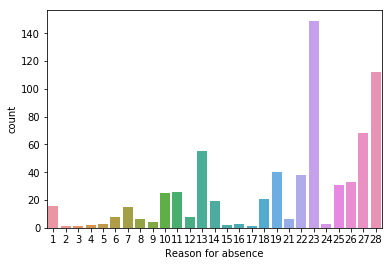

In [20]:
sns.countplot(x='Reason for absence',data=allabsents)

# Model evaluation

In [755]:
allabsents=allabsents[allabsents['Absenteeism time in hours']<20]
allabsents=allabsents[allabsents['Absenteeism time in hours']!=7]
allabsents=allabsents[allabsents['Height']<177]
#allabsents=allabsents[allabsents['Age']<52]
allabsents=allabsents[allabsents['Work load Average/day ']<375000]
allabsents=allabsents[allabsents['Hit target']>82.5]

In [756]:
de=pd.get_dummies(allabsents['Reason for absence'],prefix='Reason')
da=pd.get_dummies(allabsents['Month of absence'],prefix='Month')
pp=pd.get_dummies(allabsents['Social drinker'],prefix='soc')
pj=pd.get_dummies(allabsents['Social smoker'],prefix='smo')
pa=pd.get_dummies(allabsents['Day of the week'],prefix='day')
px=pd.get_dummies(allabsents['Seasons'],prefix='smo')
rr=pd.get_dummies(allabsents['Education'],prefix='edu')
hj=pd.get_dummies(allabsents['Pet'],prefix='pet')
kl=pd.get_dummies(allabsents['Son'],prefix='Son')

fe=allabsents[['Age','Weight','Transportation expense' ,'Body mass index','Distance from Residence to Work','Service time','Height','Work load Average/day ','Hit target']]

x_f=pd.concat([fe,de,px,da,pp,pj,pa,rr,hj,kl],axis=1)



In [757]:
fe[['Age','Weight','Transportation expense' ,'Body mass index','Distance from Residence to Work','Service time','Height','Work load Average/day ','Hit target']]=StandardScaler().fit_transform(fe[['Age','Weight','Transportation expense' ,'Body mass index','Distance from Residence to Work','Service time','Height','Work load Average/day ','Hit target']])
xe=pd.concat([fe,de,px,da,pp,pj,pa,rr,hj,kl],axis=1)

/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [735]:
#Log transform our Y component
absent_time=allabsents['Absenteeism time in hours']
log_absent_time=np.log(absent_time+1)
norm_log_absent_time= normalize(log_absent_time)

#sns.distplot(labsent_time)


In [758]:
import statsmodels.api as sm
X=xe
#X=X_features_values
Y=log_absent_time
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=324)

model=sm.OLS(Y_train,X_train).fit()
op1=model.predict(X_test)
r2_score(Y_test,op1)

0.36641469620865885

In [1016]:
dr=pd.DataFrame(model.pvalues,index=xe.columns,columns=['parameters'])
di=dr[dr['parameters']>0.08]

In [747]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,classification_report,r2_score,roc_curve,confusion_matrix
from math import sqrt
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score, precision_score,f1_score,roc_auc_score, roc_curve

In [942]:
X_features_values=xe[['Month_3','Reason_4','Body mass index','Height','Transportation expense','Weight','Distance from Residence to Work','Reason_5','Reason_1','Reason_9','Reason_17','Reason_19','Reason_22','Reason_15','Service time','Age','Reason_16','Reason_22', 'Reason_23', 'Reason_25', 'Reason_27', 'Reason_28', 'soc_0',
       'soc_1','day_3','day_4','Month_1' ,'day_5','edu_1','edu_3','pet_0','pet_1','Son_0','Son_2','Son_3','Son_4','smo_0','smo_2']]



In [939]:
#TO SCALE PRO
X=X_features_values
#X=xe
Y=log_absent_time
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=324)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(368, 37) (368,)
(158, 37) (158,)


In [951]:
#CROSS VALIDATION WITH LASSO REGRESSION
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters={'alpha':[1e-8,1e-4,1e-3,1e-2,1,5,10,20,30]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 1e-08}
-0.2054097261732594


In [956]:
#Putting all models together 
def modeleval(xtrain,ytrain,x,y):
    #Ridge
    u=Ridge(alpha=1e-8).fit(xtrain,ytrain)
    y_ridge=u.predict(x)
    RMSE_ridge=sqrt(mean_squared_error(y_true=y,y_pred=y_ridge))
    #lasso
    f=Lasso(alpha=0.001).fit(xtrain,ytrain)
    y_lasso=u.predict(x)
    RMSE_lasso=sqrt(mean_squared_error(y_true=y,y_pred=y_lasso))
    #linear
    lm = LinearRegression().fit(xtrain, ytrain)
    Y_linear = lm.predict(x)
    RMSE_linear=sqrt(mean_squared_error(y_true=y,y_pred=Y_linear))
    mse=mean_squared_error(y_true=y,y_pred=Y_linear)
    #decision tree
    regressor=DecisionTreeRegressor(max_depth=3).fit(xtrain, ytrain)
    Y_regre=regressor.predict(x)
    RMSE_regre=sqrt(mean_squared_error(y_true=y,y_pred=Y_regre))
    
    #RandomForest
    random=RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42).fit(xtrain, ytrain)
    Y_random=random.predict(x)
    #RMSE random
    RMSE_random=sqrt(mean_squared_error(y_true=y,y_pred=Y_random))
    print('Ridge Regression score:',u.score(x,y),', RMSE:',RMSE_ridge)
    print('Lasso Regression score:',f.score(x,y),', RMSE:',RMSE_lasso)
    print('Linear Regression score:',lm.score(x,y),',  RMSE:',RMSE_linear)
    print('Decision tree score:',regressor.score(x,y),',  RMSE:',RMSE_regre)
    print('Random Forest Regressor score:',random.score(x, y),'RMSE:',RMSE_random)
    #print('Logistic Regression score:',',  RMSE:',RMSE_logi)

In [982]:
#Putting all models together 
def modeleval(xtrain,ytrain,x,y):
    #Ridge
    u=Ridge(alpha=1e-8).fit(xtrain,ytrain)
    y_ridge=u.predict(x)
    RMSE_ridge=sqrt(mean_squared_error(y_true=y,y_pred=y_ridge))
    #lasso
    f=Lasso(alpha=0.001).fit(xtrain,ytrain)
    y_lasso=u.predict(x)
    RMSE_lasso=sqrt(mean_squared_error(y_true=y,y_pred=y_lasso))
    #linear
    lm = LinearRegression().fit(xtrain, ytrain)
    Y_linear = lm.predict(x)
    RMSE_linear=sqrt(mean_squared_error(y_true=y,y_pred=Y_linear))
    mse=mean_squared_error(y_true=y,y_pred=Y_linear)
    #decision tree
    regressor=DecisionTreeRegressor(max_depth=3).fit(xtrain, ytrain)
    Y_regre=regressor.predict(x)
    RMSE_regre=sqrt(mean_squared_error(y_true=y,y_pred=Y_regre))
    
    #RandomForest
    random=RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42).fit(xtrain, ytrain)
    Y_random=random.predict(x)
    #RMSE random
    RMSE_random=sqrt(mean_squared_error(y_true=y,y_pred=Y_random))
    all={'R_Squared':[u.score(x,y),f.score(x,y),lm.score(x,y),regressor.score(x,y),random.score(x,y)],'RMSE':[RMSE_ridge,RMSE_lasso,RMSE_linear,RMSE_regre,RMSE_random]}
    dg=pd.DataFrame(data=all)
    di=dg.rename({0:'Ridge',1:'Lasso',2:'Linear',3:'Decision Tree',4:'RandomForest'},axis='index')
    print(di)
    print(di.plot(kind="bar",figsize=(10,10)))

               R_Squared      RMSE
Ridge           0.397460  0.463984
Lasso           0.386162  0.463984
Linear          0.397460  0.463984
Decision Tree   0.268164  0.511349
RandomForest    0.296140  0.501480
AxesSubplot(0.125,0.125;0.775x0.755)


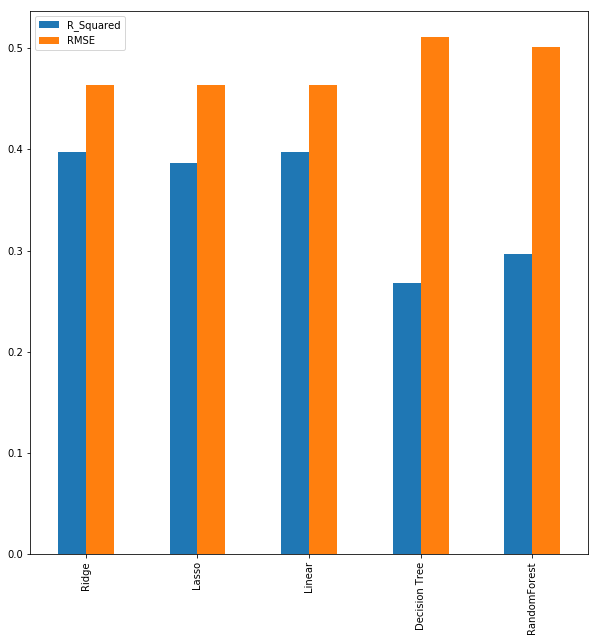

In [983]:
modeleval(X_train,Y_train,X_test,Y_test)

After looking at parameters with both pvalues less than 0.09 and the ones with higher coef estimates, Linear  regression, Lasso and Ridge  end up being the best out of all the models with a 39.7% model variability.

Text(0,0.5,'Residuals')

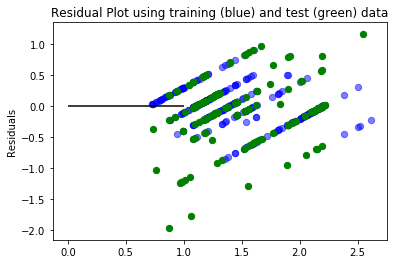

In [984]:
#residual
lm1 =RandomForestRegressor(n_estimators=100,random_state=42).fit(X_train,Y_train)
plt.scatter(lm1.predict(X_train),lm1.predict(X_train)-Y_train,c='b',s=40,alpha=0.5)
plt.scatter(lm1.predict(X_test),lm1.predict(X_test)-Y_test,c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=1)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

Text(0,0.5,'Y_Predicted')

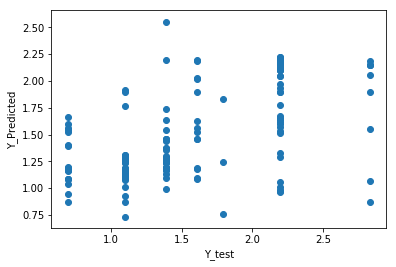

In [985]:
plt.scatter(Y_test,lm1.predict(X_test))
plt.xlabel('Y_test')
plt.ylabel('Y_Predicted')

# Classification

In [987]:
aba=[]
for i in allabsents['Absenteeism time in hours']:
    if i<8:
        aba.append(0)
    else:
        aba.append(1)
allabsents['newabsent']=aba


In [508]:
bo=[]
for i in allabsents['Reason for absence']:
    if i<20:
        bo.append('ICD')
    else:
        bo.append('Non ICD')
allabsents['newReason']=bo

/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


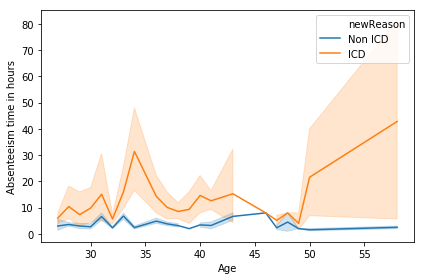

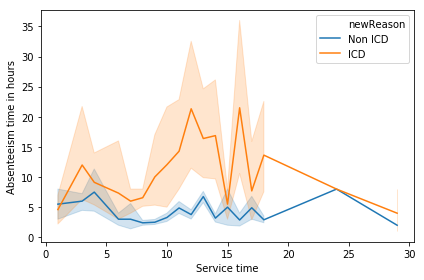

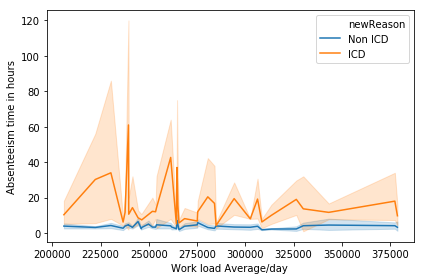

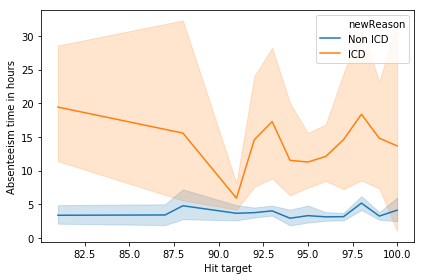

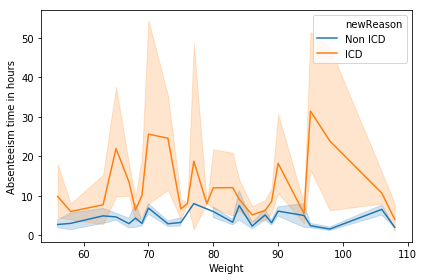

In [510]:
col=['Age','Service time','Work load Average/day ','Hit target','Weight']
for i in col:
    sns.lineplot(x=i,y='Absenteeism time in hours',hue='newReason',data=allabsents)
    plt.tight_layout()
    plt.show()


In [995]:
#XX=X_features_values
XX=xe
YY=allabsents['newabsent']
XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.3,random_state=324)
print (XX_train.shape, YY_train.shape)
print (XX_test.shape, YY_test.shape)

(368, 73) (368,)
(158, 73) (158,)


In [1019]:
#Putting all models together 
def modeleval(xtrain,ytrain,x,y):
    #RandomForest
    ra=RandomForestClassifier(n_jobs=-1,n_estimators=300,random_state=42)
    random=ra.fit(xtrain, ytrain)
    Y_random=random.predict(x)
    y_hat = random.predict_proba(x)[::,1]
    fpr, tpr,_ = roc_curve(y,  y_hat)
    auc = roc_auc_score(y, y_hat)
    #RMSE random
    RMSE_random=sqrt(mean_squared_error(y_true=y,y_pred=Y_random))
    #LogisticRegression
    logi=LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial').fit(xtrain, ytrain)
    Y_logi=logi.predict(x)
    y_hat1 = logi.predict_proba(x)[::,1]
    fpr, tpr,_ = roc_curve(y,  y_hat1)
    auc1 = roc_auc_score(y, y_hat1)
    #Logi RMSE
    RMSE_logi=sqrt(mean_squared_error(y_true=y,y_pred=Y_logi))
    all={'R_Squared':[random.score(x,y),logi.score(x,y)],'AUC':[auc,auc1]}
    dg=pd.DataFrame(data=all)
    di=dg.rename({0:'RandomForest',1:'Logistic Regression'},axis='index')
    print(di)
    print(di.plot(kind="bar",figsize=(10,10)))

                     R_Squared       AUC
RandomForest          0.829114  0.906658
Logistic Regression   0.816456  0.831005
AxesSubplot(0.125,0.125;0.775x0.755)


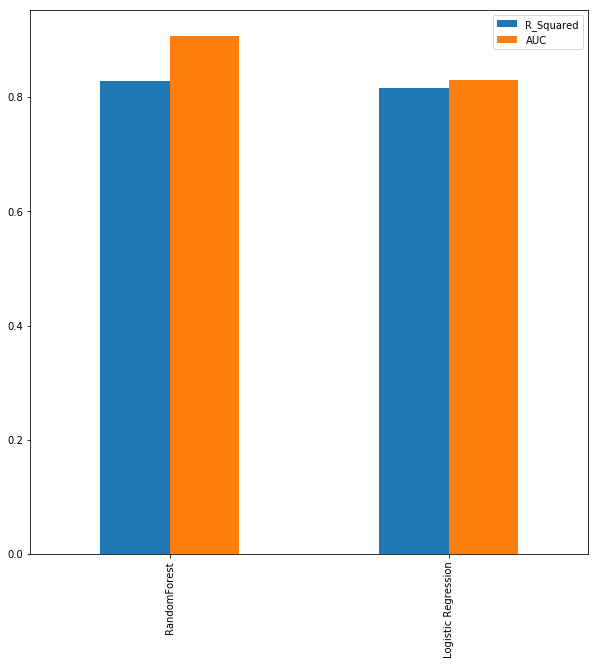

In [1020]:
modeleval(XX_train,YY_train,XX_test,YY_test)

In [999]:
random=RandomForestClassifier(n_estimators=300,random_state=42,n_jobs=-1)
fity=random.fit(XX_train, YY_train)
Y_random=random.predict(XX_test)
y_hat = random.predict_proba(XX_test)[::,1]
colu=pd.DataFrame(random.feature_importances_,
                                   index = xe.columns,columns=['importance']).sort_values('importance', ascending=False)

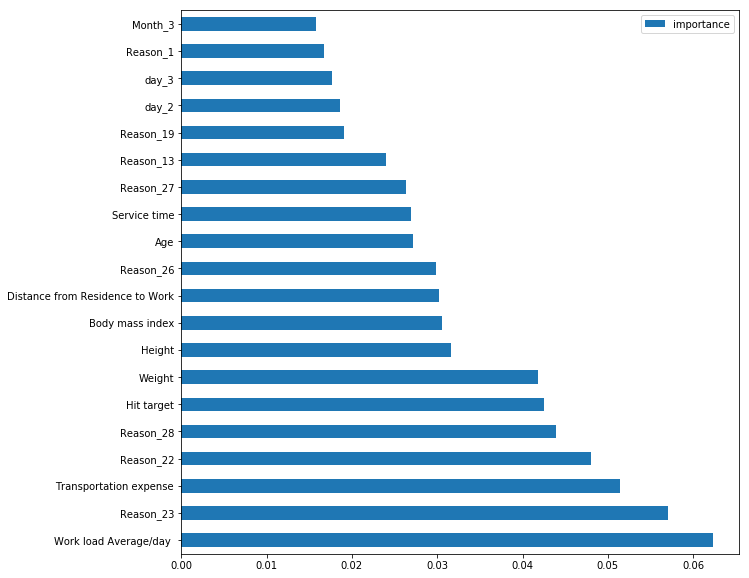

In [1034]:
col=colu[colu['importance']>=0.015]
col.plot(kind="barh",figsize=(10,10));

In [1035]:
fp=col.index
XX=xe[fp]
YY=allabsents['newabsent']

XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.3,random_state=42)

random=RandomForestClassifier(n_estimators=300,random_state=42,n_jobs=-1)
fity=random.fit(XX_train, YY_train)
Y_random=random.predict(XX_test)
y_hat = random.predict_proba(XX_test)[::,1]
auc = roc_auc_score(YY_test, y_hat)
print('R^2:',random.score(XX_test,YY_test))
print('AUC score:',auc)



R^2: 0.8291139240506329
AUC score: 0.9006712626995647


Even after doing an optimization of features, we get similar values.